# NBA Player Career Projection #
## _DSCI 100 Group Project_ ##

## Introduction ## 

Prompts:
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question

Basketball is a globally renowned sport with a massive following, and the professional leagues are the pinnacle of talent and competition. Understanding player statistics is essential for team management, player evaluation, and fan engagement. The "all_seasons" dataset captures data that outlines the performance of basketball players across various seasons (from 1996-1997 season to 2022-2023 season). Using this dataset, our predictive question could be, for instance, how a player's attributes and performance in their rookie seasons relate to their overall career performance. The dataset encompasses several key attributes, including:

- player_name
- team_abbreviation
- age
- player_height
- player_weight
- college
- country
- draft_year
- draft_round
- draft_number
- games played
- points per game (pts)
- rebounds per game (reb)
- assists per game (ast)
- net_rating
- offensive rebound percentage (oreb_pct)
- defensive rebound percentage (dreb_pct)
- usage percentage (usg_pct)
- true shooting percentage (ts_pct)
- assist percentage (ast_pct)
- season

By analyzing this dataset, we aim to draw insights and patterns from past player statistics, potentially aiding in the selection, trading, and performance prediction of rookie players in future basketball seasons by estimating their potential through statistics. 

### Research question: ###
How does a player's physical attributes and scoring statistics in their rookie year correlate to their total points after X amount of seasons? We will attempt to answer this question by forming a regression line using physical attributes, scoring statistics of past players. We will make distinctions between X amount of seasons played by colors in plots.

## Preliminary exploratory data analysis ##

Prompts: 
- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

The nba data set can be read by downloading the dataset from the website (link: https://www.kaggle.com/datasets/justinas/nba-players-data/) and read into R using read_csv from the tidyverse library. We have stored it in the "data" folder.

In [1]:
# importing the tidyverse library
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [7]:
# reading the dataset in the data folder
nba_raw <- read_csv("data/all_seasons.csv")

# looking at the the first 6 rows
head(nba_raw)

New names:
• `` -> `...1`
Rows: 12844 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): player_name, team_abbreviation, college, country, draft_year, draf...
dbl (14): ...1, age, player_height, player_weight, gp, pts, reb, ast, net_ra...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,⋯,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,Randy Livingston,HOU,22,193.04,94.80073,Louisiana State,USA,1996,2,⋯,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28,190.50,86.18248,Northwestern Oklahoma,USA,1994,2,⋯,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26,203.20,103.41898,North Carolina,USA,1993,1,⋯,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30,203.20,102.05820,Florida State,USA,1989,1,⋯,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23,213.36,119.74829,UCLA,USA,1995,1,⋯,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
5,Gerald Wilkins,ORL,33,198.12,102.05820,Tennessee-Chattanooga,USA,1985,2,⋯,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1996-97


In [8]:
# some values in draft_year are "undrafted" hence the reason why draft_year is a character column
nba_undrafted <- filter(nba_raw, draft_year == "Undrafted")
head(nba_undrafted)
nrow(nba_undrafted)

...1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,⋯,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
29,Emanual Davis,HOU,28,195.58,87.99685,Delaware State,USA,Undrafted,Undrafted,⋯,5.0,1.7,2.0,6.6,0.011,0.098,0.144,0.565,0.191,1996-97
39,Erick Strickland,DAL,23,190.50,95.25432,Nebraska,USA,Undrafted,Undrafted,⋯,10.6,3.2,2.4,-6.4,0.032,0.112,0.216,0.510,0.161,1996-97
41,Evric Gray,NJN,27,200.66,106.59412,Nevada-Las Vegas,USA,Undrafted,Undrafted,⋯,2.6,0.6,0.4,17.5,0.026,0.049,0.192,0.388,0.065,1996-97
46,Henry James,ATL,31,203.20,99.79024,St. Mary's (TX),USA,Undrafted,Undrafted,⋯,6.7,1.5,0.4,1.2,0.034,0.067,0.171,0.555,0.036,1996-97
54,Jimmy Carruth,MIL,27,208.28,120.20188,Virginia Tech,USA,Undrafted,Undrafted,⋯,1.3,1.0,0.0,-17.7,0.000,0.211,0.103,0.727,0.000,1996-97
57,Joe Courtney,SAS,27,203.20,106.59412,Southern Mississippi,USA,Undrafted,Undrafted,⋯,2.8,1.8,0.0,-6.1,0.097,0.095,0.151,0.388,0.000,1996-97


[1] 2358

### Data tidying ###
Looking at the columns, we see that "draft_year" and "draft_round" are character columns, instead of numeric. Upon investigation into the data we see that this is because some players came into the NBA league undrafted and were picked up by teams through other methods, and thus are marked as "undrafted" under the "draft_year" and "draft_round" columns. Since we want to select and use rookie players who have only played in the 2022 season as our test data, we must filter out players who have played in more than one season for training and players who have only played in 2022 season for test data. However, because some players went undrafted, it is difficult to determine what year those players were rookies. (If we say that a player is a rookie in the first season of all the observations we have of them, then what happens if the first season of all the observations we have of them is the first season recorded in this data set and they were undrafted? Since we have no data of earlier seasons we wouldn't know if that season was truly their rookie season.) Thus, to make data manipulation and analysis easier, we will only consider players that were drafted 

Since college, country and the team that they played for are not important for our data analysis, we will select the rest of the columns during our data processing. Additionally, to make data manipulation easier, we will also change season into a numeric value by only keeping the year the season began (ex. "1996-1997" into 1996).

In [18]:
nba_data <- nba_raw |>
    filter(draft_year != "Undrafted" & draft_round != "Undrafted" & draft_number != "Undrafted") |>
    separate(season, into = c("season_start", "season_end"), "-") |>
    mutate(season_start = as.numeric(season_start), draft_year = as.numeric(draft_year), 
           draft_round = as.numeric(draft_round), draft_number = as.numeric(draft_number)) |>
    select(player_name, age:player_weight, draft_year:season_start) 
#verifying that we have the correct amount of rows: 12844 (nba_raw) - 2358(nba_undrafted) = 10486
head(nba_data)
nrow(nba_data)

player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Randy Livingston,22,193.04,94.80073,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996
Gaylon Nickerson,28,190.50,86.18248,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996
George Lynch,26,203.20,103.41898,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996
George McCloud,30,203.20,102.05820,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996
George Zidek,23,213.36,119.74829,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996
Gerald Wilkins,33,198.12,102.05820,1985,2,47,80,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1996


[1] 10430

In [19]:
# separating data into training data (excludes rookies) and test data (includes rookies)
nba_rookie <- nba_data |>
    filter(draft_year == 2022)
nba_training <- nba_data |>
    filter(draft_year != 2022)

head(nba_rookie)
head(nba_training)

player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Peyton Watson,20,200.66,90.71840,2022,1,30,23,3.3,1.6,0.5,-12.0,0.043,0.139,0.174,0.553,0.087,2022
Patrick Baldwin,20,205.74,99.79024,2022,1,28,31,3.9,1.3,0.4,-12.3,0.004,0.188,0.227,0.546,0.083,2022
Paolo Banchero,20,208.28,113.39800,2022,1,1,72,20.0,6.9,3.7,-4.2,0.035,0.174,0.272,0.529,0.171,2022
Ryan Rollins,20,190.50,81.64656,2022,2,44,12,1.9,1.0,0.5,-38.1,0.043,0.153,0.260,0.508,0.214,2022
Moussa Diabate,21,208.28,95.25432,2022,2,43,22,2.7,2.3,0.2,-3.2,0.137,0.106,0.125,0.546,0.029,2022
Ousmane Dieng,20,205.74,83.91452,2022,1,11,39,4.9,2.7,1.2,2.9,0.030,0.141,0.154,0.505,0.108,2022


player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Randy Livingston,22,193.04,94.80073,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996
Gaylon Nickerson,28,190.50,86.18248,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996
George Lynch,26,203.20,103.41898,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996
George McCloud,30,203.20,102.05820,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996
George Zidek,23,213.36,119.74829,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996
Gerald Wilkins,33,198.12,102.05820,1985,2,47,80,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1996


player_name,total_points,avg_weight
<chr>,<dbl>,<dbl>
A.C. Green,2220.2,102.05820
A.J. Bramlett,8.0,102.96538
A.J. Guyton,441.0,81.64656
AJ Hammons,48.4,117.93392
AJ Price,1521.7,84.82170
Aaron Brooks,6263.7,73.02831
Aaron Gordon,7993.0,102.81419
Aaron Gray,1066.3,122.46984
Aaron Holiday,2039.8,83.91452


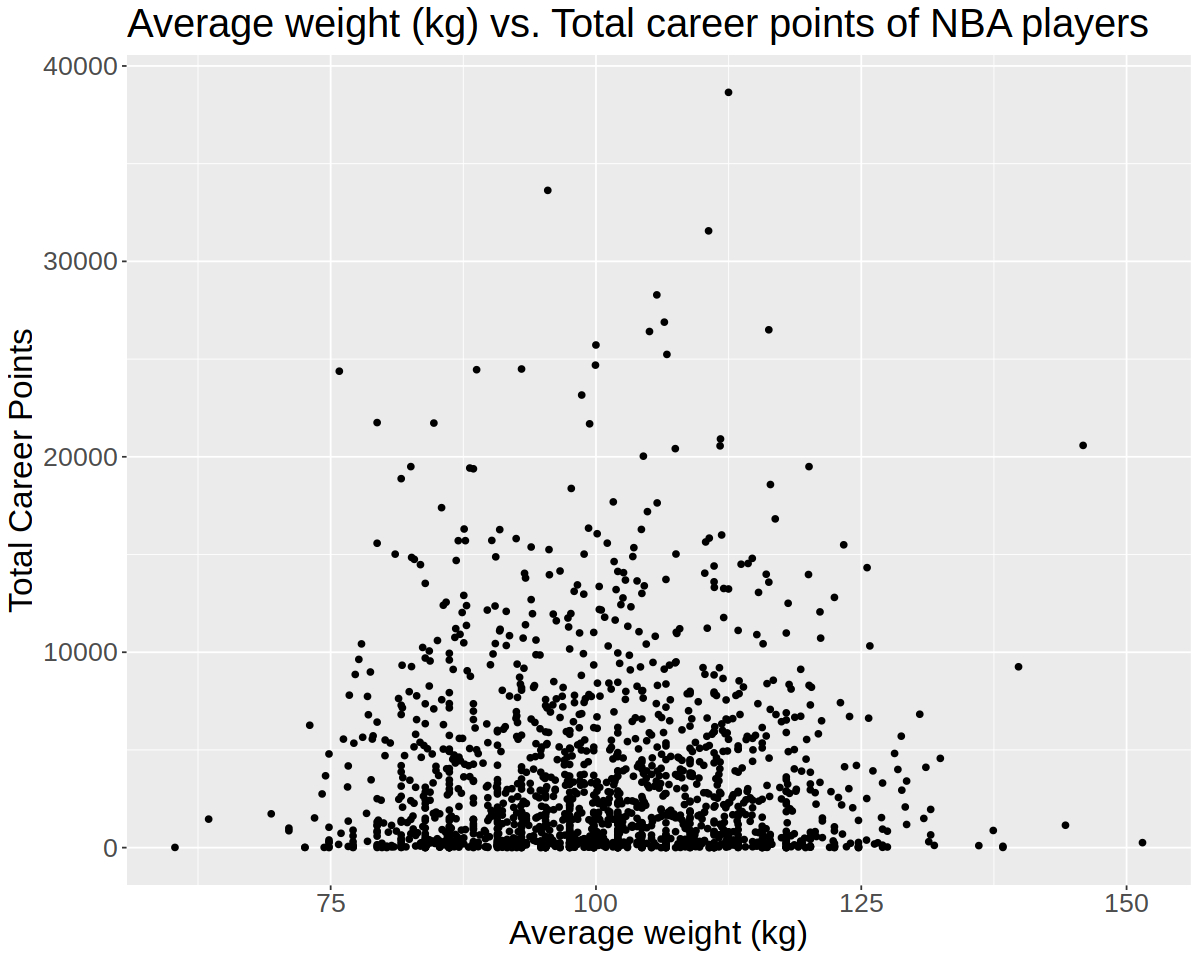

In [37]:
# Summary table summarizing the total number of points of each player
nba_summary <- nba_training |>
    group_by(player_name) |>
    summarize("total_points" = sum(pts*gp), "avg_weight" = mean(player_weight))
nba_summary

options(repr.plot.width = 10, repr.plot.height = 8)

# plotting total points vs avg weight
nba_plot <- nba_summary |>
    ggplot(aes(x = avg_weight, y = total_points)) +
    geom_point() +
    labs(x = "Average weight (kg)", y = "Total Career Points", title = "Average weight (kg) vs. Total career points of NBA players") + 
    theme(text = element_text(size = 20))
nba_plot

## Methods ##

Prompts 
- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

- Describe at least one way that you will visualize the results

Response

- To conduct our experiment, we will use the knn regression model using the columns pts (points per game) , gp (games played), height (cm), weight (kg), usg% (usage percentage) and ts% (true shooting percentage) as predictors since these factors are likely to have a significant influence on the total number of points scored over a career. Using these, predictors, we will find the projected number of points a player will score based on the average of its K nearest neighbors where the K value will be determined through evaluation and tuning.

- We will use scatter plots, with a regression line to visualize the data and results as it will give a clear view on the K nearest neighbors to the point on a line. Futhermore we will make distinctions between amount of seasons played by the player by colors in plots.

## Expected outcomes and significance ##

Prompts 
- What do you expect to find?

- What impact could such findings have?

- What future questions could this lead to?



Response
- We are trying to find the total points that a player may score at the end of his career based on other players' previous performance including points per game, games played, heights, weights, true shooting percentage and their usage percentage. 

- NBA teams could use this predicted score to identify whether a rookie player has potential or not. Also, it may be a useful index to determine a player's future trajectory. 

- This prediction model does not account for injuries and other factors. The player could improve significantly over the years and thus their rookie year statistics may not be helpful in predicting how they will perform in the future. Future questions we can also explore would be how their attributes and rookie statistics can predict other measures of performance such as assists, rebounds, etc. This way we can have a better description and prediction of their future career, not just in terms of points.